# **OBJETIVO**

Uma das coisas mais legais que temos no Brasil é o acesso a dados disponibilizados por fontes oficiais. 

Com todos os desafios que nosso país enfrenta, qualquer pessoa com um pouco de boa vontade pode ter acesso a um grande número de datasets que podem servir como fonte de estudo e até mesmo uma importante fonte de informação independente sobre os mais variados assuntos de nosso país. 

O portal brasileiro de dados abertos é sem dúvida alguma um grande parque de diversões para quem gosta de analisar dados. 

Neste Notebook resolvi pegar os dados dos candidatos às eleições do ano de 2022. O foco central foram os candidatos à Presidência da República e Deputado Federal. 


In [1]:
import pandas as pd
import os
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pasta_atual = os.getcwd()

sns.set()



In [2]:
# temp = pd.read_csv('bem_candidato_2022_BRASIL.csv', encoding= 'ISO-8859-1', sep = ';', nrows = 1)
# temp.columns

In [3]:
# dados = []

# for i in os.listdir():
#     if i == '.ipynb_checkpoints' or i =='eleicoes.ipynb':
#         pass
#     else:
#         temp = ZipFile(i)
#         temp1 = temp.extractall()


## 1.0.**IMPORTANDO OS DADOS**

Antes de importar os dados para o Jupyter li o conteúdo do dicionário que é disponibilizado junto a pasta de dados que você tem acesso logo que faz o download  no site do Portal Brasileiro de dados abertos.

Neste dicionário, temos acesso  a descrição de todas as colunas e ao tipo de dado contido em cada uma. 

Com ele também é possível fazer uma avaliação de que colunas são mais importantes para o estudo que queremos analisar. 


In [4]:
temp = ['SQ_CANDIDATO','NM_CANDIDATO', 'NM_TIPO_ELEICAO', 'SG_UE', 'DS_CARGO', 'DS_SITUACAO_CANDIDATURA', \
        'SG_PARTIDO', 'SG_PARTIDO', 'DS_NACIONALIDADE', 'DS_ESTADO_CIVIL','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_COR_RACA']
        
bens = ['SQ_CANDIDATO','ANO_ELEICAO', 'NM_UE', 'NM_UE', 'DS_TIPO_BEM_CANDIDATO', 'VR_BEM_CANDIDATO']

df = pd.read_csv('bem_candidato_2022_BRASIL.csv', encoding= 'ISO-8859-1', sep = ';', usecols= bens)
df1 = pd.read_csv('consulta_cand_2022_BRASIL.csv', encoding= 'ISO-8859-1', sep = ';', usecols= temp)

In [5]:
df1.head()

,NM_TIPO_ELEICAO,SG_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,DS_NACIONALIDADE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA
0,ELEIÇÃO ORDINÁRIA,AP,DEPUTADO ESTADUAL,30001640009,FRANCILENE LOBO MARTINS NASCIMENTO,CADASTRADO,CIDADANIA,BRASILEIRA NATA,FEMININO,SUPERIOR COMPLETO,CASADO(A),PRETA
1,ELEIÇÃO ORDINÁRIA,PE,DEPUTADO ESTADUAL,170001620393,FRANCISMAR MENDES PONTES,CADASTRADO,PSB,BRASILEIRA NATA,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA
2,ELEIÇÃO ORDINÁRIA,SP,DEPUTADO FEDERAL,250001622077,GEFFERSON LUIS DE SOUSA ROSA,CADASTRADO,AVANTE,BRASILEIRA NATA,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA
3,ELEIÇÃO ORDINÁRIA,PR,DEPUTADO FEDERAL,160001654838,PAULO CESAR ROSSI,CADASTRADO,REPUBLICANOS,BRASILEIRA NATA,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA
4,ELEIÇÃO ORDINÁRIA,MG,DEPUTADO FEDERAL,130001615458,ALBERT DENIS REIS DA SILVA,CADASTRADO,PP,BRASILEIRA NATA,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA


## 1.1.**SITUAÇÃO DOS CANDIDATOS**

>Selecionei apenas candidatos que estavam aptos ou cadastrados. 

Existem candidatos que estão com status de inapto. Pelo sim pelo não, resolvi não perder tempo tentando entender o porquê da situação e acabei filtrando apenas os candidatos que estão com statos de `Apto` ou `Cadastrado`



CADASTRADO    91.0
APTO           8.0
INAPTO         1.0
Name: DS_SITUACAO_CANDIDATURA, dtype: float64



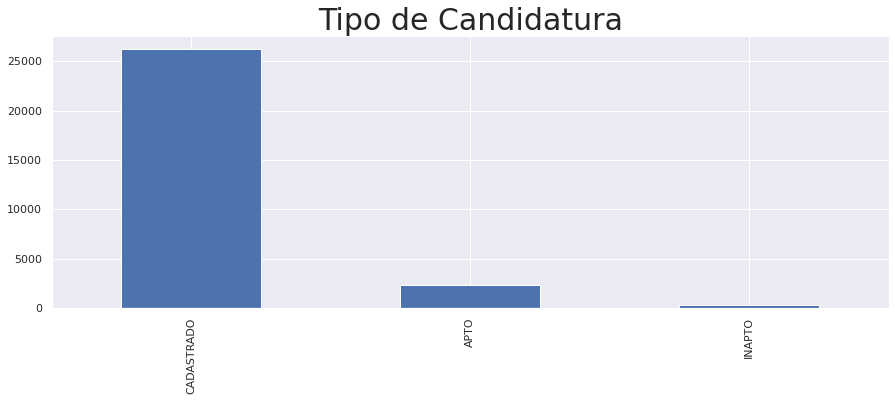

In [6]:
print()
print(round(df1['DS_SITUACAO_CANDIDATURA'].value_counts(normalize = True),2) *100 )
print()

df1['DS_SITUACAO_CANDIDATURA'].value_counts().plot(kind = 'bar', figsize = (15,5))
plt.title('Tipo de Candidatura',  fontdict={'fontsize':30});

In [7]:
df1 = df1.query('DS_SITUACAO_CANDIDATURA == "APTO" or DS_SITUACAO_CANDIDATURA == "CADASTRADO"')

In [8]:
df1['DS_CARGO'].value_counts()

DEPUTADO ESTADUAL     16387
DEPUTADO FEDERAL      10365
DEPUTADO DISTRITAL      588
SENADOR                 233
2º SUPLENTE             233
1º SUPLENTE             233
VICE-GOVERNADOR         225
GOVERNADOR              223
VICE-PRESIDENTE          12
PRESIDENTE               12
Name: DS_CARGO, dtype: int64

# 2.0.**CANDIDATOS A PRESIDENTE**

In [9]:
print()
presidente = df1.query('DS_CARGO == "PRESIDENTE"')
print(presidente['DS_CARGO'].value_counts())
print()

df1.query('DS_CARGO == "PRESIDENTE"')[['NM_CANDIDATO','SG_PARTIDO']].sort_values(by = 'NM_CANDIDATO')


PRESIDENTE    12
Name: DS_CARGO, dtype: int64



,NM_CANDIDATO,SG_PARTIDO
10035,CIRO FERREIRA GOMES,PDT
24178,JAIR MESSIAS BOLSONARO,PL
19534,JOSE MARIA EYMAEL,DC
27385,LEONARDO PÉRICLES VIEIRA ROQUE,UP
6568,LUIZ FELIPE CHAVES D AVILA,NOVO
19134,LUIZ INÁCIO LULA DA SILVA,PT
2652,PABLO HENRIQUE COSTA MARÇAL,PROS
16550,ROBERTO JEFFERSON MONTEIRO FRANCISCO,PTB
10281,SIMONE NASSAR TEBET,MDB
2031,SOFIA PADUA MANZANO,PCB


### 2.1.**GRAU DE INSTRUÇÃO DOS CANDIDATOS**

Nota-se que a grande quantidade dos candidatos possui ensino superior. Isso pode indicar que a qualidade dos governos tende a melhorar por conta do maior grau instrução.

In [10]:
presidente['DS_GRAU_INSTRUCAO'].value_counts()

SUPERIOR COMPLETO              10
ENSINO FUNDAMENTAL COMPLETO     1
ENSINO MÉDIO COMPLETO           1
Name: DS_GRAU_INSTRUCAO, dtype: int64

### 2.2.**SUPERIOR COMPLETO**

In [11]:
presidente.query('DS_GRAU_INSTRUCAO == "SUPERIOR COMPLETO"')['NM_CANDIDATO'].sort_values()

10035                     CIRO FERREIRA GOMES
24178                  JAIR MESSIAS BOLSONARO
19534                       JOSE MARIA EYMAEL
6568               LUIZ FELIPE CHAVES D AVILA
2652              PABLO HENRIQUE COSTA MARÇAL
16550    ROBERTO JEFFERSON MONTEIRO FRANCISCO
10281                     SIMONE NASSAR TEBET
2031                      SOFIA PADUA MANZANO
7484                  SORAYA VIEIRA THRONICKE
28610     VERA LUCIA PEREIRA DA SILVA SALGADO
Name: NM_CANDIDATO, dtype: object

### 2.3.**ENSINO FUNDAMENTAL COMPLETO**

In [12]:
presidente.query('DS_GRAU_INSTRUCAO == "ENSINO FUNDAMENTAL COMPLETO"')['NM_CANDIDATO']

19134    LUIZ INÁCIO LULA DA SILVA
Name: NM_CANDIDATO, dtype: object

### 2.4.**ENSINO MÉDIO COMPLETO**

In [13]:
presidente.query('DS_GRAU_INSTRUCAO == "ENSINO MÉDIO COMPLETO"')['NM_CANDIDATO']

27385    LEONARDO PÉRICLES VIEIRA ROQUE
Name: NM_CANDIDATO, dtype: object

### 2.5.**BENS DOS CANDIDATOS**

Para verificar os bens dos candidatos, acabei tendo que fazer um merge entre as duas tabelas. 

Com estes dados consegui tambem identificar o tipo de aplicação financeira que cada candidato declarou. 

In [14]:
patrimonio = presidente.merge(df, how = 'left')

In [15]:
patrimonio.head()

,NM_TIPO_ELEICAO,SG_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,DS_NACIONALIDADE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,ANO_ELEICAO,NM_UE,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,ELEIÇÃO ORDINÁRIA,BR,PRESIDENTE,280001600167,SOFIA PADUA MANZANO,APTO,PCB,BRASILEIRA NATA,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,2022,BRASIL,Caderneta de poupança,"4000,00"
1,ELEIÇÃO ORDINÁRIA,BR,PRESIDENTE,280001600167,SOFIA PADUA MANZANO,APTO,PCB,BRASILEIRA NATA,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,2022,BRASIL,Casa,"294000,00"
2,ELEIÇÃO ORDINÁRIA,BR,PRESIDENTE,280001600167,SOFIA PADUA MANZANO,APTO,PCB,BRASILEIRA NATA,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,2022,BRASIL,Apartamento,"200000,00"
3,ELEIÇÃO ORDINÁRIA,BR,PRESIDENTE,280001600179,PABLO HENRIQUE COSTA MARÇAL,CADASTRADO,PROS,BRASILEIRA NATA,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,2022,BRASIL,Outros bens imóveis,"54984,33"
4,ELEIÇÃO ORDINÁRIA,BR,PRESIDENTE,280001600179,PABLO HENRIQUE COSTA MARÇAL,CADASTRADO,PROS,BRASILEIRA NATA,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,2022,BRASIL,Sala ou conjunto,"100000,00"


In [16]:
patrimonio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NM_TIPO_ELEICAO          167 non-null    object
 1   SG_UE                    167 non-null    object
 2   DS_CARGO                 167 non-null    object
 3   SQ_CANDIDATO             167 non-null    int64 
 4   NM_CANDIDATO             167 non-null    object
 5   DS_SITUACAO_CANDIDATURA  167 non-null    object
 6   SG_PARTIDO               167 non-null    object
 7   DS_NACIONALIDADE         167 non-null    object
 8   DS_GENERO                167 non-null    object
 9   DS_GRAU_INSTRUCAO        167 non-null    object
 10  DS_ESTADO_CIVIL          167 non-null    object
 11  DS_COR_RACA              167 non-null    object
 12  ANO_ELEICAO              167 non-null    int64 
 13  NM_UE                    167 non-null    object
 14  DS_TIPO_BEM_CANDIDATO    167 non-null    o

In [17]:
# Convertendo Valor do Bem
patrimonio['VR_BEM_CANDIDATO'] = patrimonio['VR_BEM_CANDIDATO'].apply(lambda x: float(x.replace(',', '.')))

In [18]:
total = round(patrimonio['VR_BEM_CANDIDATO'].sum(),2)
f'R${total: ,.2f}'.replace(',', '_'). replace('.', ','). replace('_', '.')

'R$ 145.275.098,99'

>Veja o valor total de patromonio dos candidatos

Aqui vale uma observação. O candidato a deputado federal que tem o maior patrimônio, supera a soma de todos os candidatos à presidência da república juntos. 

In [19]:
dados = patrimonio.groupby(['NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum().sort_values(ascending = False).reset_index()
dados['VR_BEM_CANDIDATO'] = dados['VR_BEM_CANDIDATO'].apply(lambda x: f'R${x: ,.2f}'.replace(',', '_'). replace('.', ','). replace('_', '.'))
dados

,NM_CANDIDATO,VR_BEM_CANDIDATO
0,PABLO HENRIQUE COSTA MARÇAL,"R$ 96.942.541,15"
1,LUIZ FELIPE CHAVES D AVILA,"R$ 24.619.627,66"
2,LUIZ INÁCIO LULA DA SILVA,"R$ 7.423.725,78"
3,JOSE MARIA EYMAEL,"R$ 6.572.826,60"
4,CIRO FERREIRA GOMES,"R$ 3.039.761,97"
5,SIMONE NASSAR TEBET,"R$ 2.323.735,38"
6,JAIR MESSIAS BOLSONARO,"R$ 2.317.554,73"
7,SORAYA VIEIRA THRONICKE,"R$ 783.000,00"
8,ROBERTO JEFFERSON MONTEIRO FRANCISCO,"R$ 745.323,41"
9,SOFIA PADUA MANZANO,"R$ 498.000,00"


>O candidato Pablo Marçal é de longe o candidato mais rico deste pleito.

Veja que o tipo de aplicação mais comum é o de "Depósito bancário em conta corrente no País", no entando não é o que possui mais dinheiro alocado.

In [20]:
patrimonio['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10)

Depósito bancário em conta corrente no País                     20
Apartamento                                                     16
Ações (inclusive as provenientes de linha telefônica)           15
Casa                                                            14
Quotas ou quinhões de capital                                   12
Caderneta de poupança                                            9
Terreno                                                          9
OUTROS BENS E DIREITOS                                           9
Veículo automotor terrestre: caminhão, automóvel, moto, etc.     9
Crédito decorrente de empréstimo                                 7
Name: DS_TIPO_BEM_CANDIDATO, dtype: int64

In [21]:
def extratoInvestimento(candidato):
    temp = patrimonio.query('NM_CANDIDATO == @candidato').\
           groupby(['DS_TIPO_BEM_CANDIDATO']).sum().sort_values(by = 'VR_BEM_CANDIDATO', ascending = False).\
           reset_index()[['DS_TIPO_BEM_CANDIDATO','VR_BEM_CANDIDATO']]

    total = temp['VR_BEM_CANDIDATO'].sum()
    print(f'R$ {total: ,.2f}')

    temp['VR_BEM_CANDIDATO'] = temp['VR_BEM_CANDIDATO'].apply(lambda x: f'R${x: ,.2f}'.replace(',', '_'). replace('.', ','). replace('_', '.'))

    return temp

### 2.6.**PATRIMONIO INDIVIDUAL DE CADA CANDIDATO**

In [22]:
extratoInvestimento('PABLO HENRIQUE COSTA MARÇAL')

R$  96,942,541.15


,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,Outras participações societárias,"R$ 93.715.103,68"
1,Ações (inclusive as provenientes de linha tele...,"R$ 955.622,37"
2,OUTROS BENS E DIREITOS,"R$ 596.181,87"
3,Bem relacionado com o exercício da atividade a...,"R$ 500.000,00"
4,Depósito bancário em conta corrente no País,"R$ 344.104,10"
5,Consórcio não contemplado,"R$ 323.566,21"
6,"Aplicação de renda fixa (CDB, RDB e outros)","R$ 232.772,20"
7,Apartamento,"R$ 100.000,00"
8,Sala ou conjunto,"R$ 100.000,00"
9,Outros bens imóveis,"R$ 54.984,33"


In [23]:
extratoInvestimento('LUIZ FELIPE CHAVES D AVILA')

R$  24,619,627.66


,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,Quotas ou quinhões de capital,"R$ 21.031.213,62"
1,Casa,"R$ 3.348.515,20"
2,"Aplicação de renda fixa (CDB, RDB e outros)","R$ 238.578,79"
3,Outras aplicações e Investimentos,"R$ 1.320,05"


In [24]:
extratoInvestimento('LUIZ INÁCIO LULA DA SILVA')

R$  7,423,725.78


,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,VGBL - Vida Gerador de Benefício Livre,"R$ 5.570.798,99"
1,OUTROS BENS E DIREITOS,"R$ 430.020,99"
2,Terreno,"R$ 397.733,45"
3,Crédito decorrente de empréstimo,"R$ 250.000,00"
4,Construção,"R$ 246.918,82"
5,"Aplicação de renda fixa (CDB, RDB e outros)","R$ 185.744,81"
6,"Veículo automotor terrestre: caminhão, automóv...","R$ 133.475,00"
7,Apartamento,"R$ 132.905,93"
8,Quotas ou quinhões de capital,"R$ 49.000,00"
9,Depósito bancário em conta corrente no País,"R$ 20.862,23"


In [25]:
extratoInvestimento('JOSE MARIA EYMAEL')

R$  6,572,826.60


,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,Crédito decorrente de empréstimo,"R$ 4.865.198,32"
1,Casa,"R$ 408.106,53"
2,Quotas ou quinhões de capital,"R$ 359.257,00"
3,"Fundos: Ações, Mútuos de Privatização, Invest....","R$ 285.941,48"
4,"Veículo automotor terrestre: caminhão, automóv...","R$ 234.660,00"
5,Embarcação,"R$ 130.770,00"
6,Apartamento,"R$ 119.857,21"
7,Benfeitorias,"R$ 39.767,40"
8,Outras participações societárias,"R$ 38.176,00"
9,Terreno,"R$ 18.884,69"


In [26]:
extratoInvestimento('CIRO FERREIRA GOMES')

R$  3,039,761.97


,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,Apartamento,"R$ 1.068.293,92"
1,Crédito decorrente de alienação,"R$ 1.004.590,70"
2,Casa,"R$ 460.000,00"
3,"Veículo automotor terrestre: caminhão, automóv...","R$ 190.000,00"
4,Outros créditos e poupança vinculados,"R$ 155.972,06"
5,Quotas ou quinhões de capital,"R$ 62.000,00"
6,Crédito decorrente de empréstimo,"R$ 36.000,00"
7,Dinheiro em espécie - moeda nacional,"R$ 31.916,28"
8,VGBL - Vida Gerador de Benefício Livre,"R$ 28.517,32"
9,Depósito bancário em conta corrente no País,"R$ 2.471,69"


In [27]:
extratoInvestimento('SIMONE NASSAR TEBET')

R$  2,323,735.38


,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,Apartamento,"R$ 1.391.903,69"
1,Terreno,"R$ 751.209,33"
2,Casa,"R$ 121.397,28"
3,Depósito bancário em conta corrente no País,"R$ 59.225,08"


In [28]:
extratoInvestimento('JAIR MESSIAS BOLSONARO')

R$  2,317,554.73


,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,Casa,"R$ 1.142.303,54"
1,Caderneta de poupança,"R$ 591.047,58"
2,Depósito bancário em conta corrente no País,"R$ 316.524,61"
3,Apartamento,"R$ 240.930,00"
4,"Veículo automotor terrestre: caminhão, automóv...","R$ 26.500,00"
5,Quotas ou quinhões de capital,"R$ 249,00"
6,Ações (inclusive as provenientes de linha tele...,"R$ 0,00"


---

## 3.0.**CANDIDATOS DEPUTADO FEDERAL**

### **CANDITADOS A DEPUTADO FEDERAL <font style ="color: blue"> POR PARTIDO </font>**

O partido Republicanos é o paritido que possui o maior numero de candidatos.

Também podemos observar que todos os partidos possuem um número muito parecido de candidatos. 

In [29]:
deputados = df1.query('DS_CARGO == "DEPUTADO FEDERAL"')
deputados.groupby(['SG_PARTIDO']).size().sort_values(ascending = False).head(20)

SG_PARTIDO
REPUBLICANOS     519
UNIÃO            511
PL               503
PP               503
PODE             495
PTB              490
PROS             487
MDB              483
PDT              469
PATRIOTA         468
PSB              448
PSD              420
PSC              419
AVANTE           414
SOLIDARIEDADE    404
PT               369
AGIR             364
PRTB             336
PSDB             327
PSOL             310
dtype: int64

## 3.1.**CANDIDATOS POR <font style = "color:blue"> GENERO POR PARTIDO </font>**

Apenas 34% dos candidatos é do sexo feminino

Quantidade em número absoluto
           GENERO  QUANTIDADE
0       MASCULINO        6765
1        FEMININO        3598
2  NÃO DIVULGÁVEL           2

Quantidade em percentual
           GENERO  QUANTIDADE
0       MASCULINO       65.27
1        FEMININO       34.71
2  NÃO DIVULGÁVEL        0.02



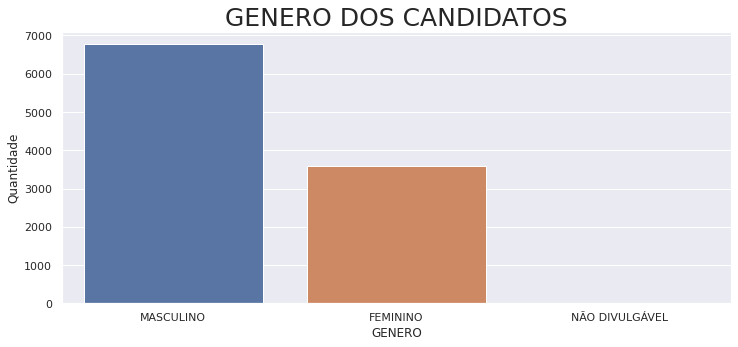

In [30]:
from locale import normalize


imagem = sns.countplot(data = deputados, x = 'DS_GENERO')
imagem.set_ylabel('Quantidade', fontsize = 12);
imagem.set_xlabel('GENERO')
imagem.set_title('GENERO DOS CANDIDATOS', fontsize = 25)
imagem.figure.set_size_inches(12,5)

print('Quantidade em número absoluto')
dados = deputados['DS_GENERO'].value_counts().reset_index()
dados.rename(columns = {'index':'GENERO', 'DS_GENERO':'QUANTIDADE'}, inplace = True)
print(dados)
print()

print('Quantidade em percentual')
dados1 = deputados['DS_GENERO'].value_counts(normalize = True) * 100
dados1 = dados1.reset_index()
dados1.rename(columns = {'index':'GENERO', 'DS_GENERO':'QUANTIDADE'}, inplace = True)
dados1['QUANTIDADE'] = round(dados1['QUANTIDADE'],2)
print(dados1)
print()


### 3.2.**CANDIDATOS SEXO<font style = "color:red"> FEMININO</font> POR PARTIDO**

,PARTIDO,SG_PARTIDO
0,PROS,178
1,UNIÃO,177
2,REPUBLICANOS,173
3,PP,169
4,PODE,168


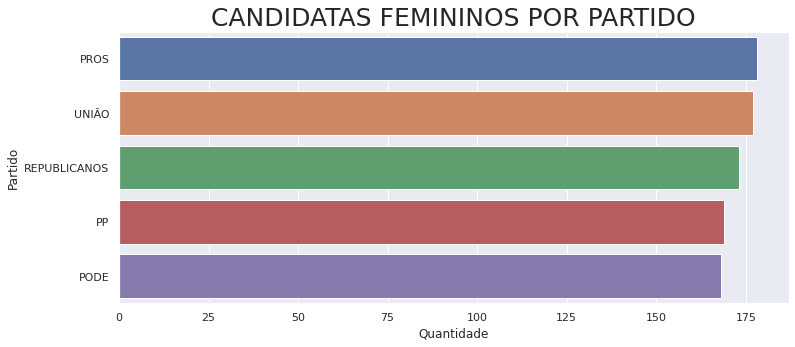

In [31]:
feminino = deputados.query('DS_GENERO == "FEMININO"')
temp = feminino['SG_PARTIDO'].value_counts().reset_index().head(5)
temp.rename(columns={'index':'PARTIDO'}, inplace = True)

imagem = sns.barplot(data = temp, x = 'SG_PARTIDO', y = 'PARTIDO')
imagem.set_ylabel('Partido', fontsize = 12);
imagem.set_xlabel('Quantidade')
imagem.set_title('CANDIDATAS FEMININOS POR PARTIDO', fontsize = 25)
imagem.figure.set_size_inches(12,5)

temp

### 3.3.**CANDIDATOS SEXO<font style = "color:blue"> MASCULINO</font> POR PARTIDO**

,PARTIDO,SG_PARTIDO
0,REPUBLICANOS,346
1,PL,340
2,PP,334
3,UNIÃO,334
4,PTB,330


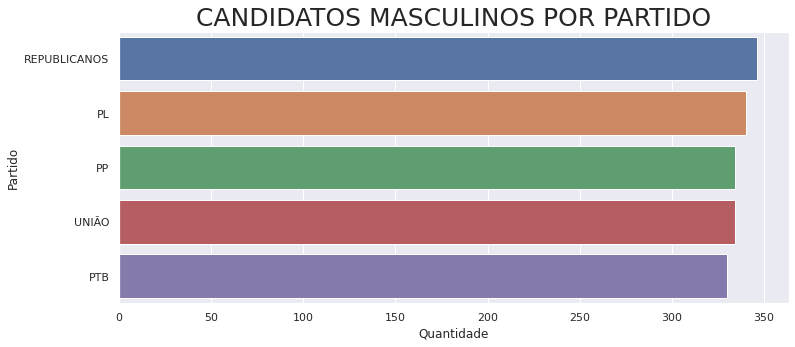

In [32]:
feminino = deputados.query('DS_GENERO == "MASCULINO"')
temp = feminino['SG_PARTIDO'].value_counts().reset_index().head(5)
temp.rename(columns={'index':'PARTIDO'}, inplace = True)

imagem = sns.barplot(data = temp, x = 'SG_PARTIDO', y = 'PARTIDO')
imagem.set_ylabel('Partido', fontsize = 12);
imagem.set_xlabel('Quantidade')
imagem.set_title('CANDIDATOS MASCULINOS POR PARTIDO', fontsize = 25)
imagem.figure.set_size_inches(12,5)

temp

---

### 3.4.**ESCOLARIDADE DOS CANDIDATOS**

Pode-se observar que assim como nas candidaturas a presidencia, os deputados possuem um alto grau de Instrução. 

Quase 60% dos candidatos possui curso superior.


               GRAU DE INSTRUCAO  PERCENTUAL
0              SUPERIOR COMPLETO       58.08
1          ENSINO MÉDIO COMPLETO       23.65
2            SUPERIOR INCOMPLETO        9.26
3    ENSINO FUNDAMENTAL COMPLETO        3.97
4  ENSINO FUNDAMENTAL INCOMPLETO        2.18
5        ENSINO MÉDIO INCOMPLETO        2.03
6                   LÊ E ESCREVE        0.82
7                 NÃO DIVULGÁVEL        0.02



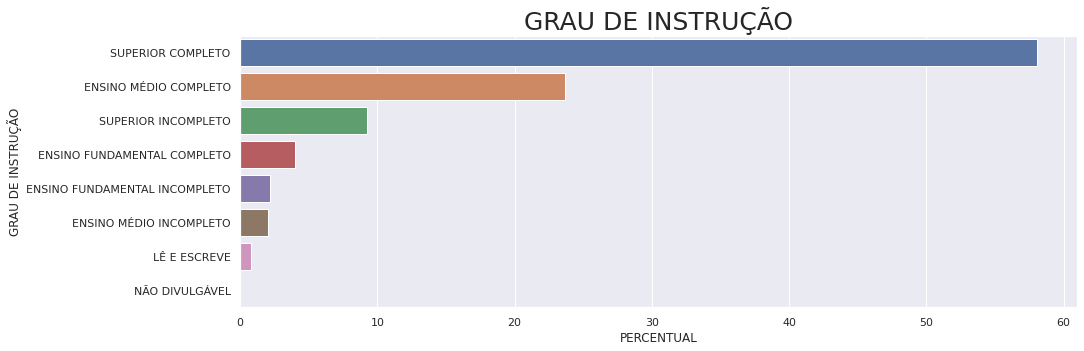

In [33]:
temp = round(deputados['DS_GRAU_INSTRUCAO'].value_counts(normalize = True) * 100,2)
temp = temp.reset_index()
temp.rename(columns = {'index': 'GRAU DE INSTRUCAO', 'DS_GRAU_INSTRUCAO':'PERCENTUAL'}, inplace = True)


imagem = sns.barplot(data = temp, y = 'GRAU DE INSTRUCAO', x = 'PERCENTUAL' )
imagem.set_ylabel('GRAU DE INSTRUÇÃO', fontsize = 12);
imagem.set_xlabel('PERCENTUAL')
imagem.set_title('GRAU DE INSTRUÇÃO', fontsize = 25)
imagem.figure.set_size_inches(15,5)

print()
print(temp)
print()

### 3.5.**CURSO SUPERIOR POR PARTIDO**

O partido que mais possui candidatos com curso Superior é o partido União.


     SG_PARTIDO  QUANTIDADE
0         UNIÃO         359
1            PL         346
2  REPUBLICANOS         335
3            PP         322
4           MDB         307



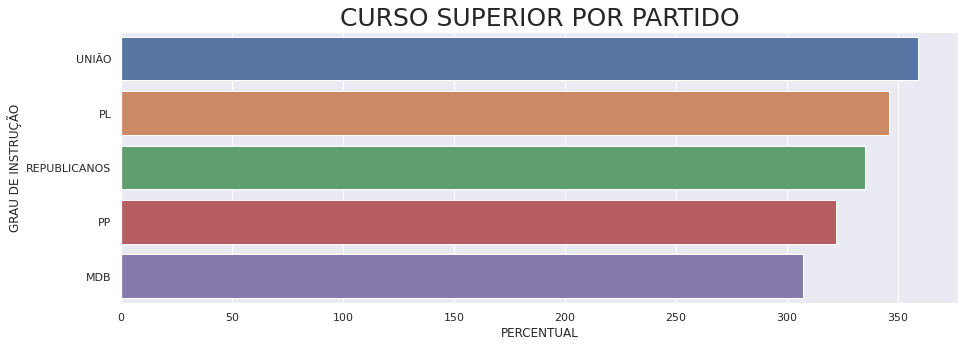

In [34]:
temp = deputados.query('DS_GRAU_INSTRUCAO == "SUPERIOR COMPLETO"').groupby(['SG_PARTIDO']).size().sort_values(ascending = False).reset_index().head()
temp.rename(columns={0:'QUANTIDADE'}, inplace = True)

imagem = sns.barplot(data = temp, y = 'SG_PARTIDO', x = 'QUANTIDADE' )
imagem.set_ylabel('GRAU DE INSTRUÇÃO', fontsize = 12);
imagem.set_xlabel('PERCENTUAL')
imagem.set_title('CURSO SUPERIOR POR PARTIDO', fontsize = 25)
imagem.figure.set_size_inches(15,5)

print()
print(temp)
print()


### 3.6.**CANDIDATOS COM CURSO SUPEDIOR DO SEXO MASCULINO**

A esmagadora maioria dos candidatos possui curso superior.


                           index  DS_GRAU_INSTRUCAO
0              SUPERIOR COMPLETO               58.0
1          ENSINO MÉDIO COMPLETO               23.0
2            SUPERIOR INCOMPLETO                9.0
3    ENSINO FUNDAMENTAL COMPLETO                4.0
4  ENSINO FUNDAMENTAL INCOMPLETO                3.0
5        ENSINO MÉDIO INCOMPLETO                2.0
6                   LÊ E ESCREVE                1.0



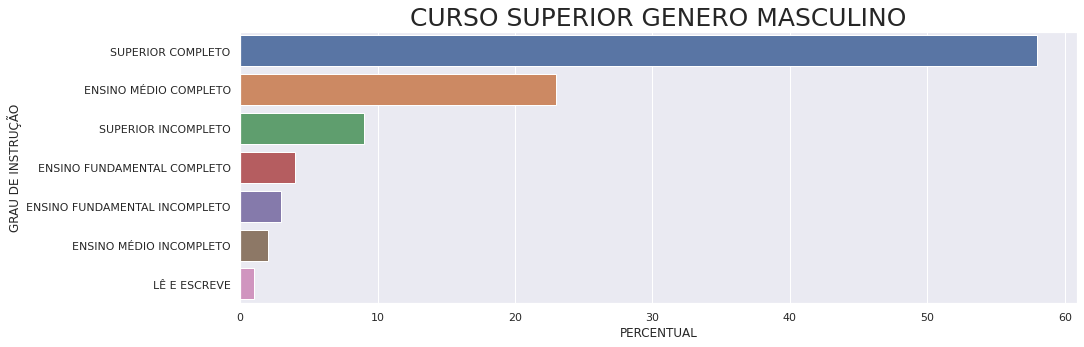

In [35]:
temp = round(deputados.query('DS_GENERO == "MASCULINO"')['DS_GRAU_INSTRUCAO'].value_counts(normalize = True) * 100)
temp = temp.reset_index()

imagem = sns.barplot(data = temp, y = 'index', x = 'DS_GRAU_INSTRUCAO' )
imagem.set_ylabel('GRAU DE INSTRUÇÃO', fontsize = 12);
imagem.set_xlabel('PERCENTUAL')
imagem.set_title('CURSO SUPERIOR GENERO MASCULINO', fontsize = 25)
imagem.figure.set_size_inches(15,5)

print()
print(temp)
print()

### 3.7.**CANDIDATOS COM CURSO SUPEDIOR DO SEXO FEMININO**

A esmagadora maioria dos candidatos possui curso superior.


                           index  DS_GRAU_INSTRUCAO
0              SUPERIOR COMPLETO               58.0
1          ENSINO MÉDIO COMPLETO               25.0
2            SUPERIOR INCOMPLETO                9.0
3    ENSINO FUNDAMENTAL COMPLETO                4.0
4        ENSINO MÉDIO INCOMPLETO                2.0
5  ENSINO FUNDAMENTAL INCOMPLETO                1.0
6                   LÊ E ESCREVE                1.0



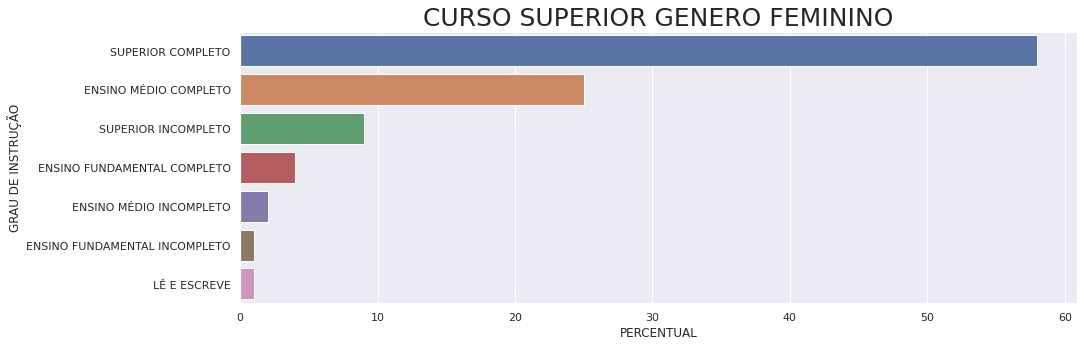

In [36]:
temp = round(deputados.query('DS_GENERO == "FEMININO"')['DS_GRAU_INSTRUCAO'].value_counts(normalize = True) * 100)
temp = temp.reset_index()

imagem = sns.barplot(data = temp, y = 'index', x = 'DS_GRAU_INSTRUCAO' )
imagem.set_ylabel('GRAU DE INSTRUÇÃO', fontsize = 12);
imagem.set_xlabel('PERCENTUAL')
imagem.set_title('CURSO SUPERIOR GENERO FEMININO', fontsize = 25)
imagem.figure.set_size_inches(15,5)

print()
print(temp)
print()

### 3.8.**RAÇA COR X ESTADO CIVIL X GRAU DE INSTRUCAO**

### **PERCENTUAL DE PESSOAS POR RAÇA_COR**


            index  DS_COR_RACA
0          BRANCA         50.0
1           PARDA         34.0
2           PRETA         14.0
3   NÃO INFORMADO          1.0
4        INDÍGENA          1.0
5         AMARELA          0.0
6  NÃO DIVULGÁVEL          0.0


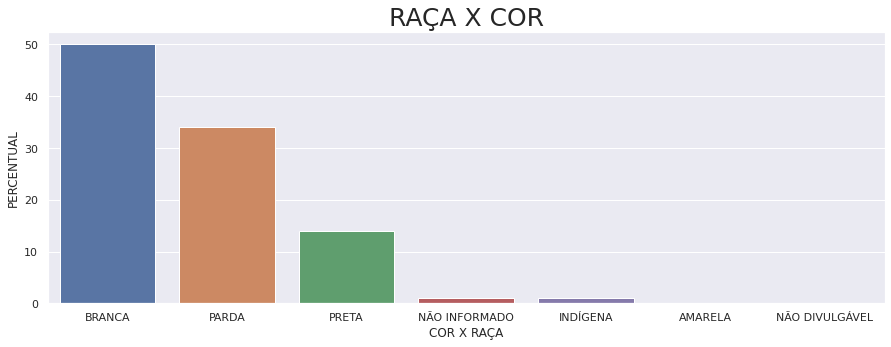

In [37]:
temp = round(deputados['DS_COR_RACA'].value_counts(normalize = True)*100)
temp = temp.reset_index()


imagem = sns.barplot(data = temp, x = 'index', y = 'DS_COR_RACA' )
imagem.set_ylabel('PERCENTUAL', fontsize = 12);
imagem.set_xlabel('COR X RAÇA')
imagem.set_title('RAÇA X COR', fontsize = 25)
imagem.figure.set_size_inches(15,5)

print()
print(temp)


              DS_ESTADO_CIVIL  QUANTIDADE  PERCENTUAL
25                  CASADO(A)        3357       32.39
28                SOLTEIRO(A)        1596       15.40
26              DIVORCIADO(A)         895        8.63
29                   VIÚVO(A)         119        1.15
27  SEPARADO(A) JUDICIALMENTE          53        0.51



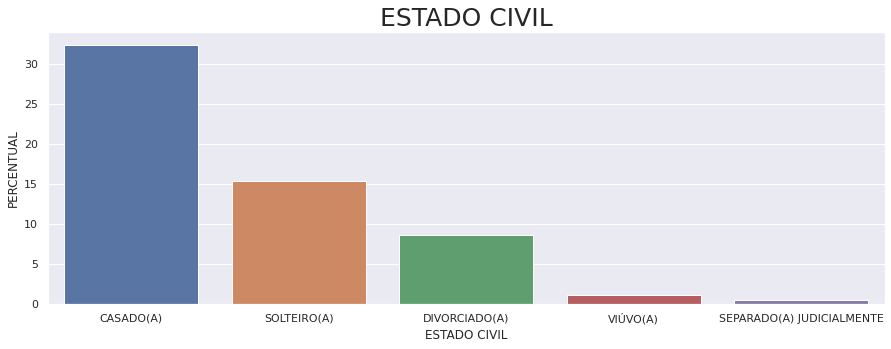

In [38]:
from turtle import color


temp = deputados.groupby(['DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL']).size().reset_index()\
    .query('DS_GRAU_INSTRUCAO == "SUPERIOR COMPLETO"').sort_values(by = 0, ascending  = False)

temp.rename(columns= {0:'QUANTIDADE'}, inplace  = True)
temp['PERCENTUAL'] = round((temp['QUANTIDADE'] / deputados['DS_ESTADO_CIVIL'].count()) * 100,2)

temp.drop('DS_GRAU_INSTRUCAO', axis = 1, inplace = True)


imagem = sns.barplot(data = temp, y = 'PERCENTUAL', x = 'DS_ESTADO_CIVIL' )
imagem.set_ylabel('PERCENTUAL', fontsize = 12);
imagem.set_xlabel('ESTADO CIVIL')
imagem.set_title('ESTADO CIVIL', fontsize = 25)
imagem.figure.set_size_inches(15,5)

print()
print(temp)
print()

>A grande maioria dos candidatos é casada e de cor branca

---

### 3.8.**COR_RAÇA X ENSINO SUPERIOR**

A ideia aqui é tentar entender qual das raças possui mais pessoas com nivel superior de educação


      DS_COR_RACA  QUANTIDADE  PERCENTUAL
9          BRANCA        3471       33.49
29          PARDA        1796       17.33
36          PRETA         667        6.44
2         AMARELA          30        0.29
15       INDÍGENA          28        0.27
22  NÃO INFORMADO          28        0.27



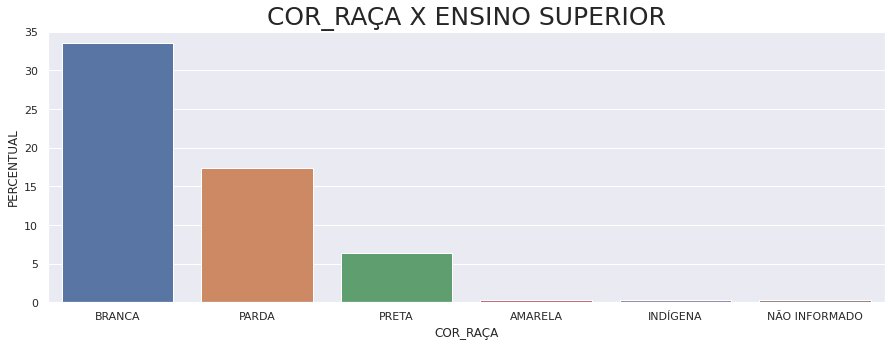

In [39]:
temp = deputados.groupby(['DS_COR_RACA','DS_GRAU_INSTRUCAO',]).size().reset_index()\
    .query('DS_GRAU_INSTRUCAO == "SUPERIOR COMPLETO"').sort_values(by = 0, ascending  = False)

temp.rename(columns={0:'QUANTIDADE'}, inplace = True)
temp['PERCENTUAL'] = round((temp['QUANTIDADE'] / deputados['DS_ESTADO_CIVIL'].count()) * 100,2)

temp.drop(['DS_GRAU_INSTRUCAO'], axis = 1, inplace = True)

imagem = sns.barplot(data = temp, x = 'DS_COR_RACA', y = 'PERCENTUAL' )
imagem.set_ylabel('PERCENTUAL', fontsize = 12);
imagem.set_xlabel('COR_RAÇA')
imagem.set_title('COR_RAÇA X ENSINO SUPERIOR', fontsize = 25)
imagem.figure.set_size_inches(15,5)

print()
print(temp)
print()

> A grande maioria das pessoas que pessui ensino superior é da cor branca

---

## 4.0.**PATRIMONIO DOS CANDIDATOS A DEPUTADOR FEDERAL**

Fazendo o merge entre o DataFrame de deputados com o DataFrame de Patrimonio dos candidatos

In [40]:

patrimonioDep = deputados.merge(df, how = 'left')

patrimonioDep.head()


,NM_TIPO_ELEICAO,SG_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,DS_NACIONALIDADE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,ANO_ELEICAO,NM_UE,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,ELEIÇÃO ORDINÁRIA,SP,DEPUTADO FEDERAL,250001622077,GEFFERSON LUIS DE SOUSA ROSA,CADASTRADO,AVANTE,BRASILEIRA NATA,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,NaN,NaN,NaN,NaN
1,ELEIÇÃO ORDINÁRIA,PR,DEPUTADO FEDERAL,160001654838,PAULO CESAR ROSSI,CADASTRADO,REPUBLICANOS,BRASILEIRA NATA,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA,2022.0,PARANÁ,Terreno,"5000,00"
2,ELEIÇÃO ORDINÁRIA,PR,DEPUTADO FEDERAL,160001654838,PAULO CESAR ROSSI,CADASTRADO,REPUBLICANOS,BRASILEIRA NATA,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA,2022.0,PARANÁ,"Aplicação de renda fixa (CDB, RDB e outros)","3017,47"
3,ELEIÇÃO ORDINÁRIA,PR,DEPUTADO FEDERAL,160001654838,PAULO CESAR ROSSI,CADASTRADO,REPUBLICANOS,BRASILEIRA NATA,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA,2022.0,PARANÁ,"Veículo automotor terrestre: caminhão, automóv...","148000,00"
4,ELEIÇÃO ORDINÁRIA,PR,DEPUTADO FEDERAL,160001654838,PAULO CESAR ROSSI,CADASTRADO,REPUBLICANOS,BRASILEIRA NATA,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA,2022.0,PARANÁ,"Aplicação de renda fixa (CDB, RDB e outros)","7503,44"


In [41]:
# Veriricando a existencia e quantidade de dadnos nulos no DataFrame
patrimonioDep.isnull().sum()

NM_TIPO_ELEICAO               0
SG_UE                         0
DS_CARGO                      0
SQ_CANDIDATO                  0
NM_CANDIDATO                  0
DS_SITUACAO_CANDIDATURA       0
SG_PARTIDO                    0
DS_NACIONALIDADE              0
DS_GENERO                     0
DS_GRAU_INSTRUCAO             0
DS_ESTADO_CIVIL               0
DS_COR_RACA                   0
ANO_ELEICAO                3737
NM_UE                      3737
DS_TIPO_BEM_CANDIDATO      3737
VR_BEM_CANDIDATO           3737
dtype: int64

In [42]:
# Limpando os dados Nulos com o Dropna.
patrimonioDep.dropna(inplace = True)

In [43]:
patrimonioDep.isnull().sum()

NM_TIPO_ELEICAO            0
SG_UE                      0
DS_CARGO                   0
SQ_CANDIDATO               0
NM_CANDIDATO               0
DS_SITUACAO_CANDIDATURA    0
SG_PARTIDO                 0
DS_NACIONALIDADE           0
DS_GENERO                  0
DS_GRAU_INSTRUCAO          0
DS_ESTADO_CIVIL            0
DS_COR_RACA                0
ANO_ELEICAO                0
NM_UE                      0
DS_TIPO_BEM_CANDIDATO      0
VR_BEM_CANDIDATO           0
dtype: int64

In [44]:
# Verificando os tipos de dados Contidos em cada uma das colunas do DataFrame
patrimonioDep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35499 entries, 1 to 39234
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NM_TIPO_ELEICAO          35499 non-null  object 
 1   SG_UE                    35499 non-null  object 
 2   DS_CARGO                 35499 non-null  object 
 3   SQ_CANDIDATO             35499 non-null  int64  
 4   NM_CANDIDATO             35499 non-null  object 
 5   DS_SITUACAO_CANDIDATURA  35499 non-null  object 
 6   SG_PARTIDO               35499 non-null  object 
 7   DS_NACIONALIDADE         35499 non-null  object 
 8   DS_GENERO                35499 non-null  object 
 9   DS_GRAU_INSTRUCAO        35499 non-null  object 
 10  DS_ESTADO_CIVIL          35499 non-null  object 
 11  DS_COR_RACA              35499 non-null  object 
 12  ANO_ELEICAO              35499 non-null  float64
 13  NM_UE                    35499 non-null  object 
 14  DS_TIPO_BEM_CANDIDATO 

In [45]:
# Tratando a Coluna "VR_BEM_CANDIDATO". Transformando o tipo de Dados para Float e trocando a "virgula" pelo "ponto"
patrimonioDep['VR_BEM_CANDIDATO'] = patrimonioDep['VR_BEM_CANDIDATO'].apply(lambda x: float(x.replace(',', '.')))
quantidade = 20

In [46]:
total = (patrimonioDep['VR_BEM_CANDIDATO'].sum()) / 5.0
f"$ {total:,.2f}".replace(',', '_'). replace('.', ','). replace('_', '.')

'$ 1.524.886.093,57'

In [47]:
pd.set_option('display.max_rows', 10000)

temp = patrimonioDep.groupby(['NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum().sort_values(ascending = False).reset_index()
temp['VR_BEM_CANDIDATO'] = temp['VR_BEM_CANDIDATO'].apply(lambda x: f'R${x: ,.2f}'.replace(',', '_'). replace('.', ','). replace('_', '.'))

temp.head(quantidade)


,NM_CANDIDATO,VR_BEM_CANDIDATO
0,EUNÍCIO LOPES DE OLIVEIRA,"R$ 158.184.458,79"
1,RUY ADRIANO BORGES MUNIZ,"R$ 158.051.565,55"
2,JOSE GOMES FERREIRA FILHO,"R$ 128.639.462,90"
3,JADYEL SILVA ALENCAR,"R$ 107.545.780,55"
4,ROBERTO SOARES DA SILVA,"R$ 100.100.000,00"
5,ALEX DOS SANTOS GARCIA,"R$ 80.009.800,00"
6,ADRIANA MANGABEIRA WANDERLEY,"R$ 77.064.788,49"
7,NEWTON BONIN,"R$ 76.117.400,00"
8,HERCILIO ARAUJO DINIZ FILHO,"R$ 65.903.045,68"
9,PAULO ROBERTO ROQUE ANTONIO KHOURI,"R$ 65.291.195,10"


In [48]:
nomes = temp['NM_CANDIDATO'].head(quantidade).to_list()

In [49]:
geral = deputados.query('NM_CANDIDATO == @nomes')[['NM_CANDIDATO','SG_PARTIDO', 'DS_GENERO','DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA']]


  DS_COR_RACA  QUANTIDADE
0      BRANCA          14
1       PARDA           4
2       PRETA           2



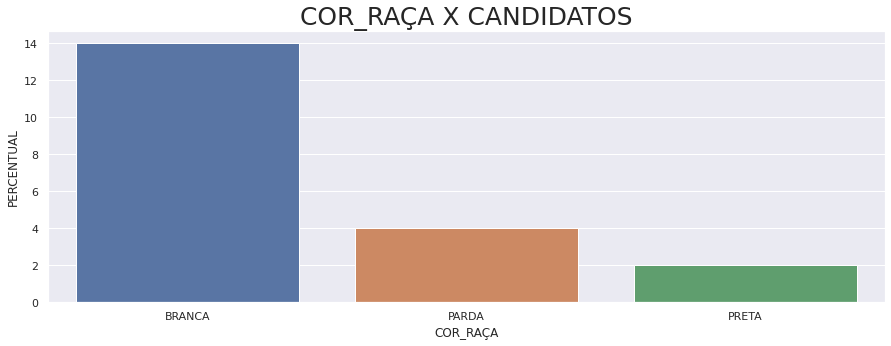

In [50]:
corRaca = geral.groupby('DS_COR_RACA').size()
corRaca= corRaca.reset_index()

corRaca.rename(columns={0:'QUANTIDADE'}, inplace = True)

imagem = sns.barplot(data = corRaca, x = 'DS_COR_RACA', y = 'QUANTIDADE' )
imagem.set_ylabel('PERCENTUAL', fontsize = 12);
imagem.set_xlabel('COR_RAÇA')
imagem.set_title('COR_RAÇA X CANDIDATOS', fontsize = 25)
imagem.figure.set_size_inches(15,5)

print()
print(corRaca)
print()


             DS_GRAU_INSTRUCAO  QUANTIDADE
0            SUPERIOR COMPLETO          15
1        ENSINO MÉDIO COMPLETO           2
2          SUPERIOR INCOMPLETO           2
3  ENSINO FUNDAMENTAL COMPLETO           1



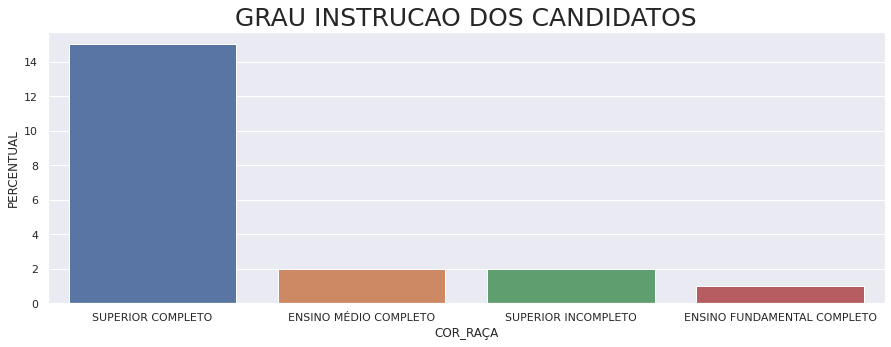

In [51]:
geralIntrucao = geral.groupby('DS_GRAU_INSTRUCAO').size().sort_values(ascending = False)
geralIntrucao = geralIntrucao.reset_index()

geralIntrucao.rename(columns = {0:'QUANTIDADE'}, inplace = True)

imagem = sns.barplot(data = geralIntrucao, x = 'DS_GRAU_INSTRUCAO', y = 'QUANTIDADE' )
imagem.set_ylabel('PERCENTUAL', fontsize = 12);
imagem.set_xlabel('COR_RAÇA')
imagem.set_title('GRAU INSTRUCAO DOS CANDIDATOS', fontsize = 25)
imagem.figure.set_size_inches(15,5)

print()
print(geralIntrucao)
print()


  DS_ESTADO_CIVIL  QUANTIDADE
0       CASADO(A)          17
1     SOLTEIRO(A)           3



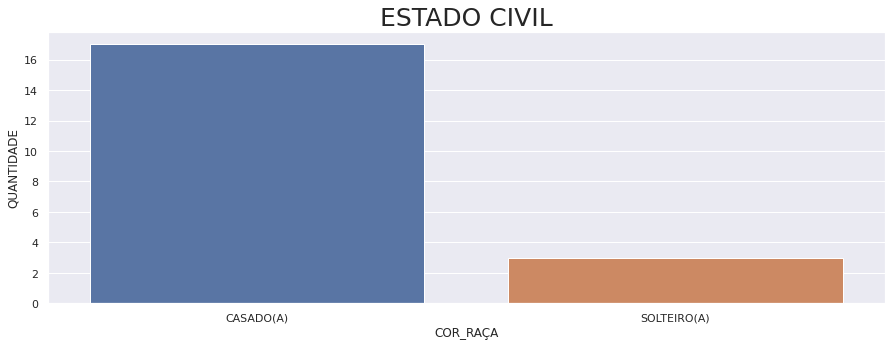

In [52]:
geralEstadoCivil = geral.groupby('DS_ESTADO_CIVIL').size().sort_values(ascending = False)
geralEstadoCivil = geralEstadoCivil.reset_index()

geralEstadoCivil.rename(columns={0:'QUANTIDADE'}, inplace = True)

imagem = sns.barplot(data = geralEstadoCivil, x = 'DS_ESTADO_CIVIL', y = 'QUANTIDADE' )
imagem.set_ylabel('QUANTIDADE', fontsize = 12);
imagem.set_xlabel('COR_RAÇA')
imagem.set_title('ESTADO CIVIL', fontsize = 25)
imagem.figure.set_size_inches(15,5)

print()
print(geralEstadoCivil)
print()

In [53]:
resumo = geral.groupby(['DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'NM_CANDIDATO']).size()
reusmo = resumo.reset_index()
tempResumo = reusmo.rename(columns = {0:'QUANTIDADE'})

finalDeputados = tempResumo.merge(temp, how = 'left')

finalDeputados.groupby(['DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'NM_CANDIDATO', 'VR_BEM_CANDIDATO']).size()


DS_GRAU_INSTRUCAO            DS_ESTADO_CIVIL  DS_COR_RACA  NM_CANDIDATO                             VR_BEM_CANDIDATO 
ENSINO FUNDAMENTAL COMPLETO  CASADO(A)        PARDA        HERCILIO ARAUJO DINIZ FILHO              R$ 65.903.045,68     1
ENSINO MÉDIO COMPLETO        CASADO(A)        BRANCA       DALTON BENONI MARTINI                    R$ 39.469.582,27     1
                             SOLTEIRO(A)      BRANCA       ROBERTO SOARES DA SILVA                  R$ 100.100.000,00    1
SUPERIOR COMPLETO            CASADO(A)        BRANCA       ALEX DOS SANTOS GARCIA                   R$ 80.009.800,00     1
                                                           ANTONIO CLAUDEMIR WECK                   R$ 39.914.173,80     1
                                                           ARTHUR MARIO PINHEIRO MACHADO            R$ 49.821.285,26     1
                                                           DILCEU JOÃO SPERAFICO                    R$ 46.435.337,14     1
                     

---

## 5.0.**ESPECTRO**

>Link do arquivo com [espectros](https://pt.wikipedia.org/wiki/Posicionamentos_dos_partidos_brasileiros)

In [54]:
espectro = pd.read_csv('espectro.csv')
espectro['SG_PARTIDO'] = espectro['Partido '].apply(lambda x: x.split("(")[1].split(")")[0])
lado = deputados.merge(espectro, how = 'left')


             index  Espectro  Percentual
0           Centro      2980       30.45
1   Centro-direita      2694       27.52
2          Direita      2099       21.44
3  Centro-esquerda      1185       12.11
4         Esquerda       830        8.48



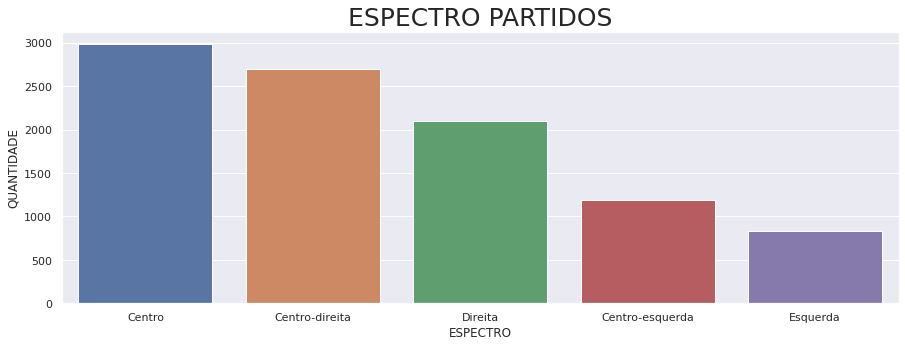

In [55]:
ladoTemp = lado['Espectro'].value_counts()
ladoTemp = ladoTemp.reset_index()
ladoTemp['Percentual'] = round((ladoTemp['Espectro'] / ladoTemp['Espectro'].sum()) * 100,2)


imagem = sns.barplot(data = ladoTemp, x = 'index', y = 'Espectro' )
imagem.set_ylabel('QUANTIDADE', fontsize = 12);
imagem.set_xlabel('ESPECTRO')
imagem.set_title('ESPECTRO PARTIDOS', fontsize = 25)
imagem.figure.set_size_inches(15,5)

print()
print(ladoTemp)
print()

# 6.0.**CONCLUSÃO**

O que podemos observar é que a grande maioria dos candidatos é de cor branca, possui curso superior e é casada. 

Chama atenção a pequena quantidade de pessoas negras e indígenas com formação superior.